# **Worldwide Covid Data**


>Elif Temiz
>>i6227751
>>>FHML

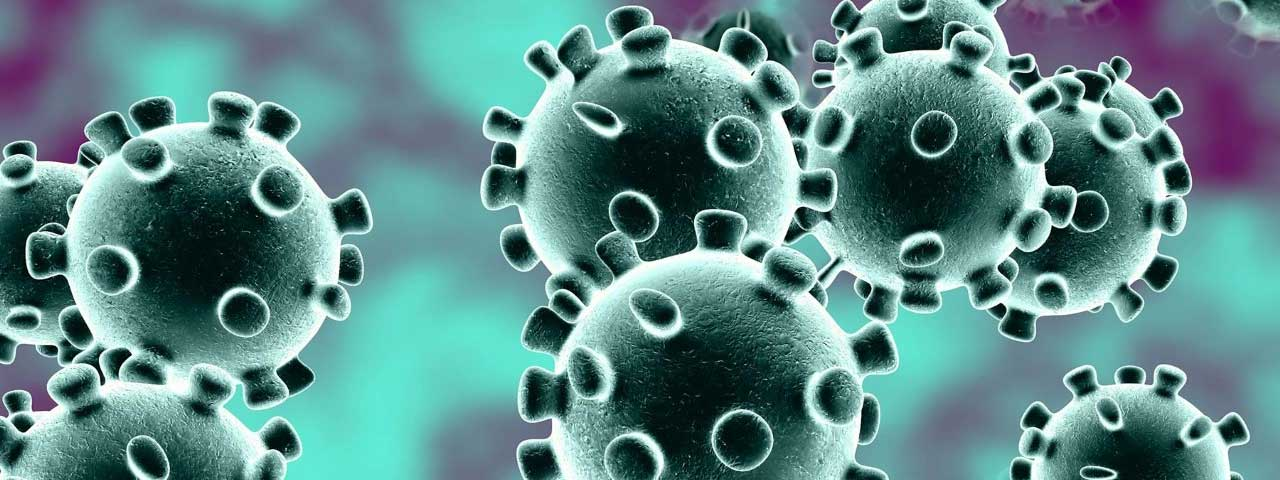

# Introduction

---



COVID-19 was firstly discovered in 2019 and has been demanding numberous sacrifices of healthcare and humankind ever since.
In response to the pandemic it caused, citizens all over the world got vaccinated against Corona in order to protect themselves and their loved ones.
After more than two years of dealing with this pandemic, a fair amount data and public health informations were collected.

In this assignment Covid-19 datasets will be analysed and presented to investigate the correlation between vaccinations and their effect on confirmed Corona cases. This is done by comnparing 2 countries: One with more and the other one with less vaccinations.

# Methods

---



The data was downloaded and prepared by firstly taking a look at the columns and rows of interest for the research question.
Afterwards the data was explored and cleaned for analysis in order to spot possible issues.


It was searched for the five most and least vaccinated countries in the given datasets. Then the most and the least vaccinated countries were singled out in order to show the biggest contrast in comparison.
They were compared through the visualization of graphs and charts.

# Results

---



In [155]:
import pandas as pd
import csv
import ipywidgets as widgets
import altair as alt
from ipywidgets import interact
from vega_datasets import data
from ipywidgets import fixed

In [156]:
mydata= pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")
mydata

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169478,ZWE,Africa,Zimbabwe,2022-03-14,242909.0,394.0,457.000,5416.0,2.0,2.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
169479,ZWE,Africa,Zimbabwe,2022-03-15,242909.0,0.0,366.571,5416.0,0.0,2.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
169480,ZWE,Africa,Zimbabwe,2022-03-16,243650.0,741.0,472.429,5418.0,2.0,2.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
169481,ZWE,Africa,Zimbabwe,2022-03-17,243650.0,0.0,300.286,5418.0,0.0,1.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


*Table 1:* Displays the complete dataset inserted from https://covid.ourworldindata.org/data/owid-covid-data.csv

In [157]:
covid = mydata.loc[:,['continent', 'iso_code', 'location', 'date','new_vaccinations_smoothed_per_million','new_cases_smoothed_per_million']]
covid

,continent,iso_code,location,date,new_vaccinations_smoothed_per_million,new_cases_smoothed_per_million
0,Asia,AFG,Afghanistan,2020-02-24,NaN,NaN
1,Asia,AFG,Afghanistan,2020-02-25,NaN,NaN
2,Asia,AFG,Afghanistan,2020-02-26,NaN,NaN
3,Asia,AFG,Afghanistan,2020-02-27,NaN,NaN
4,Asia,AFG,Afghanistan,2020-02-28,NaN,NaN
...,...,...,...,...,...,...
169478,Africa,ZWE,Zimbabwe,2022-03-14,2076.0,30.281
169479,Africa,ZWE,Zimbabwe,2022-03-15,2117.0,24.289
169480,Africa,ZWE,Zimbabwe,2022-03-16,2119.0,31.303
169481,Africa,ZWE,Zimbabwe,2022-03-17,2099.0,19.897


*Tabele 2:* Displays the selcted columns and rows relevant for my rearch question.

In [158]:
covid.isnull().sum()

continent                                10125
iso_code                                     0
location                                     0
date                                         0
new_vaccinations_smoothed_per_million    81799
new_cases_smoothed_per_million            6134
dtype: int64

In [159]:
newcovid= covid.dropna(thresh=3,subset=['continent','new_vaccinations_smoothed_per_million','new_cases_smoothed_per_million'])
newcovid

,continent,iso_code,location,date,new_vaccinations_smoothed_per_million,new_cases_smoothed_per_million
365,Asia,AFG,Afghanistan,2021-02-23,34.0,0.459
366,Asia,AFG,Afghanistan,2021-02-24,34.0,0.445
367,Asia,AFG,Afghanistan,2021-02-25,34.0,0.441
368,Asia,AFG,Afghanistan,2021-02-26,34.0,0.434
369,Asia,AFG,Afghanistan,2021-02-27,34.0,0.455
...,...,...,...,...,...,...
169477,Africa,ZWE,Zimbabwe,2022-03-13,547.0,31.293
169478,Africa,ZWE,Zimbabwe,2022-03-14,2076.0,30.281
169479,Africa,ZWE,Zimbabwe,2022-03-15,2117.0,24.289
169480,Africa,ZWE,Zimbabwe,2022-03-16,2119.0,31.303


*Table 3:* Shows the cleaned Covid data. Countries with no information available in the relevant columns were removed.

In [160]:
c1 = newcovid.groupby('location').new_vaccinations_smoothed_per_million.describe()
c1.sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Falkland Islands,66.0,21185.393939,20126.993654,3401.0,3968.00,8503.5,42942.25,53571.0
Saint Helena,91.0,13915.164835,3330.524090,10008.0,12305.00,12305.0,15915.00,27071.0
Cuba,289.0,10294.816609,6165.520093,1036.0,5574.00,9811.0,14342.00,28441.0
Gibraltar,410.0,8213.897561,8782.861431,119.0,623.00,3992.0,14283.75,31700.0
Bonaire Sint Eustatius and Saba,145.0,7412.000000,0.000000,7412.0,7412.00,7412.0,7412.00,7412.0
...,...,...,...,...,...,...,...,...
Chad,274.0,88.656934,61.722638,9.0,37.25,72.5,150.00,279.0
Haiti,243.0,87.074074,78.931518,13.0,30.50,64.0,123.50,493.0
Yemen,311.0,83.797428,64.307132,8.0,41.50,63.0,138.50,336.0


*Table 4:* Pictures the 5 countries with the least and the most overall mean of new vaccinations smoothed per million.

In [161]:
c2 = newcovid.groupby('location').new_cases_smoothed_per_million.describe()
c2.sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Faeroe Islands,385.0,1542.249182,3666.254586,0.000,5.825,72.8080,978.53300,16052.608
Denmark,457.0,1079.957632,1991.425921,31.725,109.945,164.9420,666.20600,7970.808
Iceland,433.0,959.846808,1952.450540,1.549,10.071,88.3190,384.26600,8245.840
Gibraltar,410.0,931.575615,1227.731145,0.000,59.363,383.7395,1262.52475,4537.032
Georgia,369.0,928.520518,1121.291484,77.176,284.869,589.9830,1030.31700,5450.060
...,...,...,...,...,...,...,...,...
Niger,345.0,0.438919,0.545143,0.034,0.171,0.2670,0.45500,4.070
Vanuatu,272.0,0.153654,0.662792,0.000,0.000,0.0000,0.00000,4.997
Macao,403.0,0.129769,0.288159,0.000,0.000,0.0000,0.21700,1.736


*Table 5:* Pictures the 5 countries with the least and the most overall mean of new cases smoothed per million.

In [162]:
countries=['Faerore Islands', 'Saint Helena']

In [163]:
covid_selected_countries_1 = newcovid.loc[newcovid['location'].isin(['Saint Helena','Faeroe Islands'])]
covid_selected_countries_1 

,continent,iso_code,location,date,new_vaccinations_smoothed_per_million,new_cases_smoothed_per_million
52110,Europe,FRO,Faeroe Islands,2021-01-30,1692.0,5.825
52111,Europe,FRO,Faeroe Islands,2021-01-31,1692.0,5.825
52112,Europe,FRO,Faeroe Islands,2021-02-01,1692.0,5.825
52113,Europe,FRO,Faeroe Islands,2021-02-02,1692.0,0.000
52114,Europe,FRO,Faeroe Islands,2021-02-03,1692.0,0.000
...,...,...,...,...,...,...
127874,Africa,SHN,Saint Helena,2021-05-01,15915.0,0.000
127875,Africa,SHN,Saint Helena,2021-05-02,15915.0,0.000
127876,Africa,SHN,Saint Helena,2021-05-03,15915.0,0.000
127877,Africa,SHN,Saint Helena,2021-05-04,15915.0,0.000


*Table 6:* Depicts data of two countries comparing their new vaccinations smoothed per million and new cases smoothed per million for both of them.

In [164]:
def select_country_data(iso_code, newcovid):
  return newcovid.loc[newcovid['iso_code'] == iso_code, ]

def visualize_country_data(iso_code, df):
  data_to_viz = select_country_data(iso_code, df)
  chart = alt.Chart(data_to_viz).mark_bar().encode(
   x='date:T',
    y='new_cases_smoothed_per_million:Q',
    color='location:O'
  )
  display(chart)

In [165]:
country_list = newcovid['iso_code'].unique()
interact(visualize_country_data, iso_code=country_list,df=fixed(newcovid));

interactive(children=(Dropdown(description='iso_code', options=('AFG', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG…

*Chart 1:* This interactive dropdown chart is made to pick the country of your choice in order to compare and see their individual new cases smoothed per million over correlating with a date. This is to visualize the development of the new Covid cases for each country. 

In [166]:
resize = alt.selection_interval(bind='scales')

chart1 = alt.Chart(covid_selected_countries_1).mark_point().encode(
  x='date:T',
  y='new_vaccinations_smoothed_per_million:Q',
  color='location:N'
).add_selection(
    resize
)

chart2 = alt.Chart(covid_selected_countries_1).mark_point().encode(
  x='date:T',
  y='new_cases_smoothed_per_million:Q',
  color='location:O'
).add_selection(
    resize
)

alt.concat(chart1, chart2)

alt.ConcatChart(...)

*Chart 2 & 3:* Illustration of two interactive charts individually showcasing new vaccinations smoothed per million and new cases smoothed per million in respect to a date for the two countries with two countries very high and very low in the rankings for both measurements. This is to compare the data more easily to answer the given research question. It sis possible to zoom in and out of the charts!

# Conclusion

---



When comparing the data it becomes evident, that predominantly during the 2021 cases were fewer when more people got vaccinated. However, there is a rise in new cases in 2022, which might be induced to the relaxation of measures in a lot of countries. 
Mentioning a downside of this study is that the deletion of countries with non available data could have led to the distortion from actual rankings and analyses. Additionally, we can see that some countries started accumulating numbers and data later than others making it difficult to compare the countries for the research question. Lastly, it might also be possible that in some countries healthcare is more accesissble for a wider range of the population, leading to more people getting tested. This can lead to the depiction of a very high amount of new cases in certain countries, while others a more low. This leads us to another question: does the goverment in certain countries handle Covid-19 better or is the data just wrongly analysed do to unsufficient data resulting from restricted healthcare, etc.